# PyArc Tutorial

This notebook serves as a tutorial for how to use the PyArc code to compute the radiative recombination coefficient and absorption coefficients for a given semiconductor material. In this tutorial, we will go through the whole process of calculating the absorption coefficients and radiative recombination coefficients in GaAs.


## 0. Calculaiting the dipole transition values

Before the calculation of our code, we have to prepare the dipole transition values file for GaAs with a coarse k sampling mesh in Brillouin zone. Here we choose a $10\times10\times10$ k grid as the KPOINTS file shows under 'input_file' path. Other concrete parameters involving VASP
calculation can also be found in the same folder. After calculation, the 'Transmatrix' file will occur in the calculation directory.

## 1. Interpolating the coarse K grid 

After the calculation of eigenvalues and dipole transition values under original k grid, we need to upsample the k mesh for a better approximation of the integral calculation over the whole Brillouin zone. The interpolation method includes linear, cubic, and wannier method. Here in our case we exhibite the linear interpolation method for transmatrix value and wannier interpolation for eigenvalues(can be obtain by VASP function). Generally, the linear interpolation method is accurate enough for transmatrix interpolation while the eigenvalues will significantly influence the final results. Thus, it is a better choice to use wannier interpolation for eigenvalues.

In [9]:
import numpy as np
from transmatrix_interp.Transmatrix import Transmatrix
import argparse

VB = np.array([32, 33, 34, 35, 36]) #VB bands involving calculation
CB = np.array([37, 38, 39, 40, 41]) #CB bands involving calculation
root = './test_files/' # work path
mag = [10, 10, 10] #magnification times, three values for three directions
method = ['linear', 'linear'] #default interpolation methods for eigenvalues and dipole transition values. The code will preferentially use interpolated data files offered by users.

interp = Transmatrix(VB, CB, root, method) #reorganize the data
interp.write_to_file(mag[0], mag[1], mag[2]) #output the results files

kpoints file writing: 100%|██████████████████████████████████████████████| 1000000/1000000 [00:03<00:00, 312246.00it/s]


kpoints for interpolating are generated, please use eigenvalue interpolators to generate fine eigenvalue mesh


Interpolated Eigenvalues file writing by default method: 100%|█████████████| 1000000/1000000 [12:30<00:00, 1333.29it/s]


After interpolation, the interpolated files "Eigen_geninterp" and "matrix_fine"will be generated in work path

## 2. calculating the absorption and radiative coefficients

After preparing the dense k-mesh eigenvalues and transmatrix values, our code could calculate the absorption and radiative coefficients according to users' needs. Some parameters like primitive cell volume or temperature should be offered.

In [10]:
import numpy as np
from rate.rate_calculation import rate_cal

mu = 3.9476 # refractive index for GaAs
Vcell = 183.0 # primitive cell volume
soc = False #whether soc, default is False
name =  'GaAs' #materials name
Erange = [1, 3, 301] #energy range for absorption energy calculation
start_band = 20 #started bands in wannier interpolation in vasp settings 
sigma = 0.024 # the sigma coefficients for gauss function, default is 0.024
root = './test_files/' # work path to store output file
Density = np.array([1E15, 1E16, 1E17, 1E18, 1E19]) # carrier density involving calculation
Trange = np.array([100, 200, 300]) # Teperature range involving calculation

Rate = rate_cal(name, mu, Vcell, soc, root, start_band) #preparing and reorganizing data 

Rate.absorption(Erange[0], Erange[1], Erange[2], sigma) #calculating absorption coefficients

Rate.get_Radcoeffi_results(Trange, Density) #calculating radiative coefficients

t:   0%|                                                                                         | 0/3 [00:00<?, ?it/s]C:\Users\26930\PycharmProjects\PyArc-master\rate\rate_calculation.py:307: RuntimeWarning: overflow encountered in exp
  occ1 = 1. / (1 + np.exp((-efermi1 + eig) / kT)) * kw
C:\Users\26930\PycharmProjects\PyArc-master\rate\rate_calculation.py:325: RuntimeWarning: overflow encountered in exp
  occ = 1. / (1 + np.exp((-efermi + eig) / kT)) * kw
C:\Users\26930\PycharmProjects\PyArc-master\rate\rate_calculation.py:355: RuntimeWarning: overflow encountered in exp
  occ2 = 1. / (1 + np.exp((efermi2 - eig) / kT)) * kw
C:\Users\26930\PycharmProjects\PyArc-master\rate\rate_calculation.py:371: RuntimeWarning: overflow encountered in exp
  occ = 1. / (1 + np.exp((efermi - eig) / kT)) * kw
t: 100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [10:57<00:00, 219.00s/it]


array([[9.07023706e-11, 8.99195840e-11, 8.41428404e-11, 6.02227760e-11,
        2.57443234e-11],
       [4.02119203e-11, 4.01090324e-11, 3.91409600e-11, 3.28350244e-11,
        1.82742614e-11],
       [2.45679691e-11, 2.45344994e-11, 2.42101515e-11, 2.17198824e-11,
        1.39189825e-11]])

## 3. Results and carrier distribution exhibition

After finishing all those calculations, we can vasulizing our calculation results (including absorption coefficients and B coefficients). Also, we can obtain carrier distribution graph to reveal deeper mechanism beneath different radiative performance among those semiconductors.

C:\Users\26930\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[100 100 100]


C:\Users\26930\PycharmProjects\PyArc-master\rate\figure_plot.py:280: RuntimeWarning: overflow encountered in exp
  occ1 = 1. / (1 + np.exp((-efermi1 + eig) / kT))


99% electron density achieved!


C:\Users\26930\PycharmProjects\PyArc-master\rate\figure_plot.py:224: RuntimeWarning: overflow encountered in exp
  occ2 = 1. / (1 + np.exp((efermi2 - eig) / kT))
C:\Users\26930\PycharmProjects\PyArc-master\rate\figure_plot.py:244: RuntimeWarning: overflow encountered in exp
  occ = 1. / (1 + np.exp((efermi - eig) / kT))


99% electron density achieved!


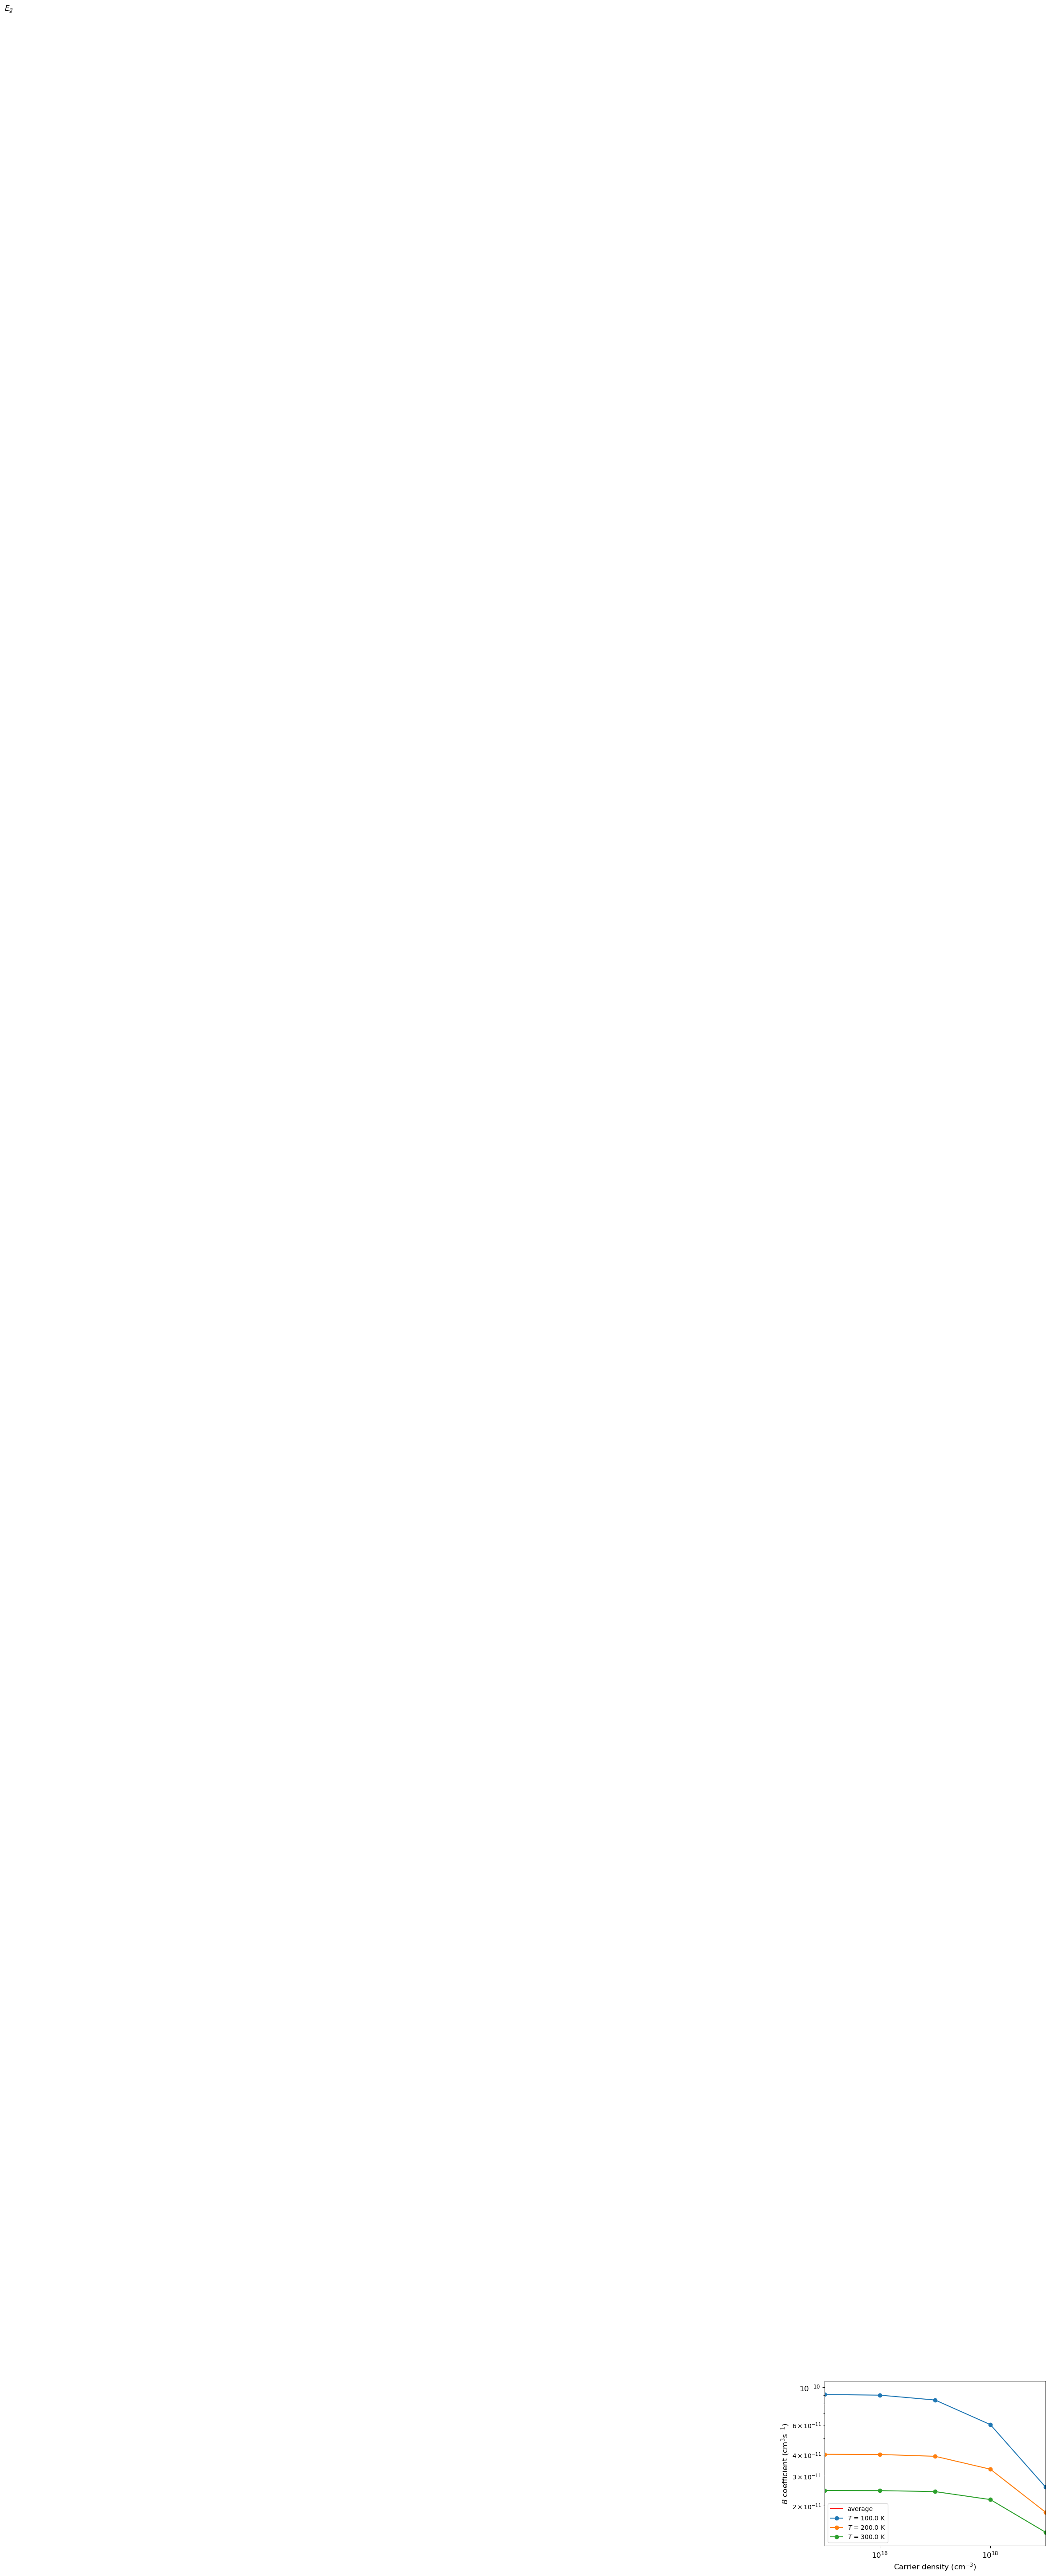

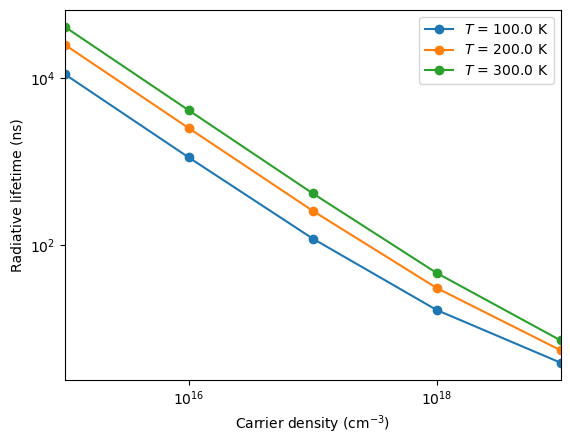

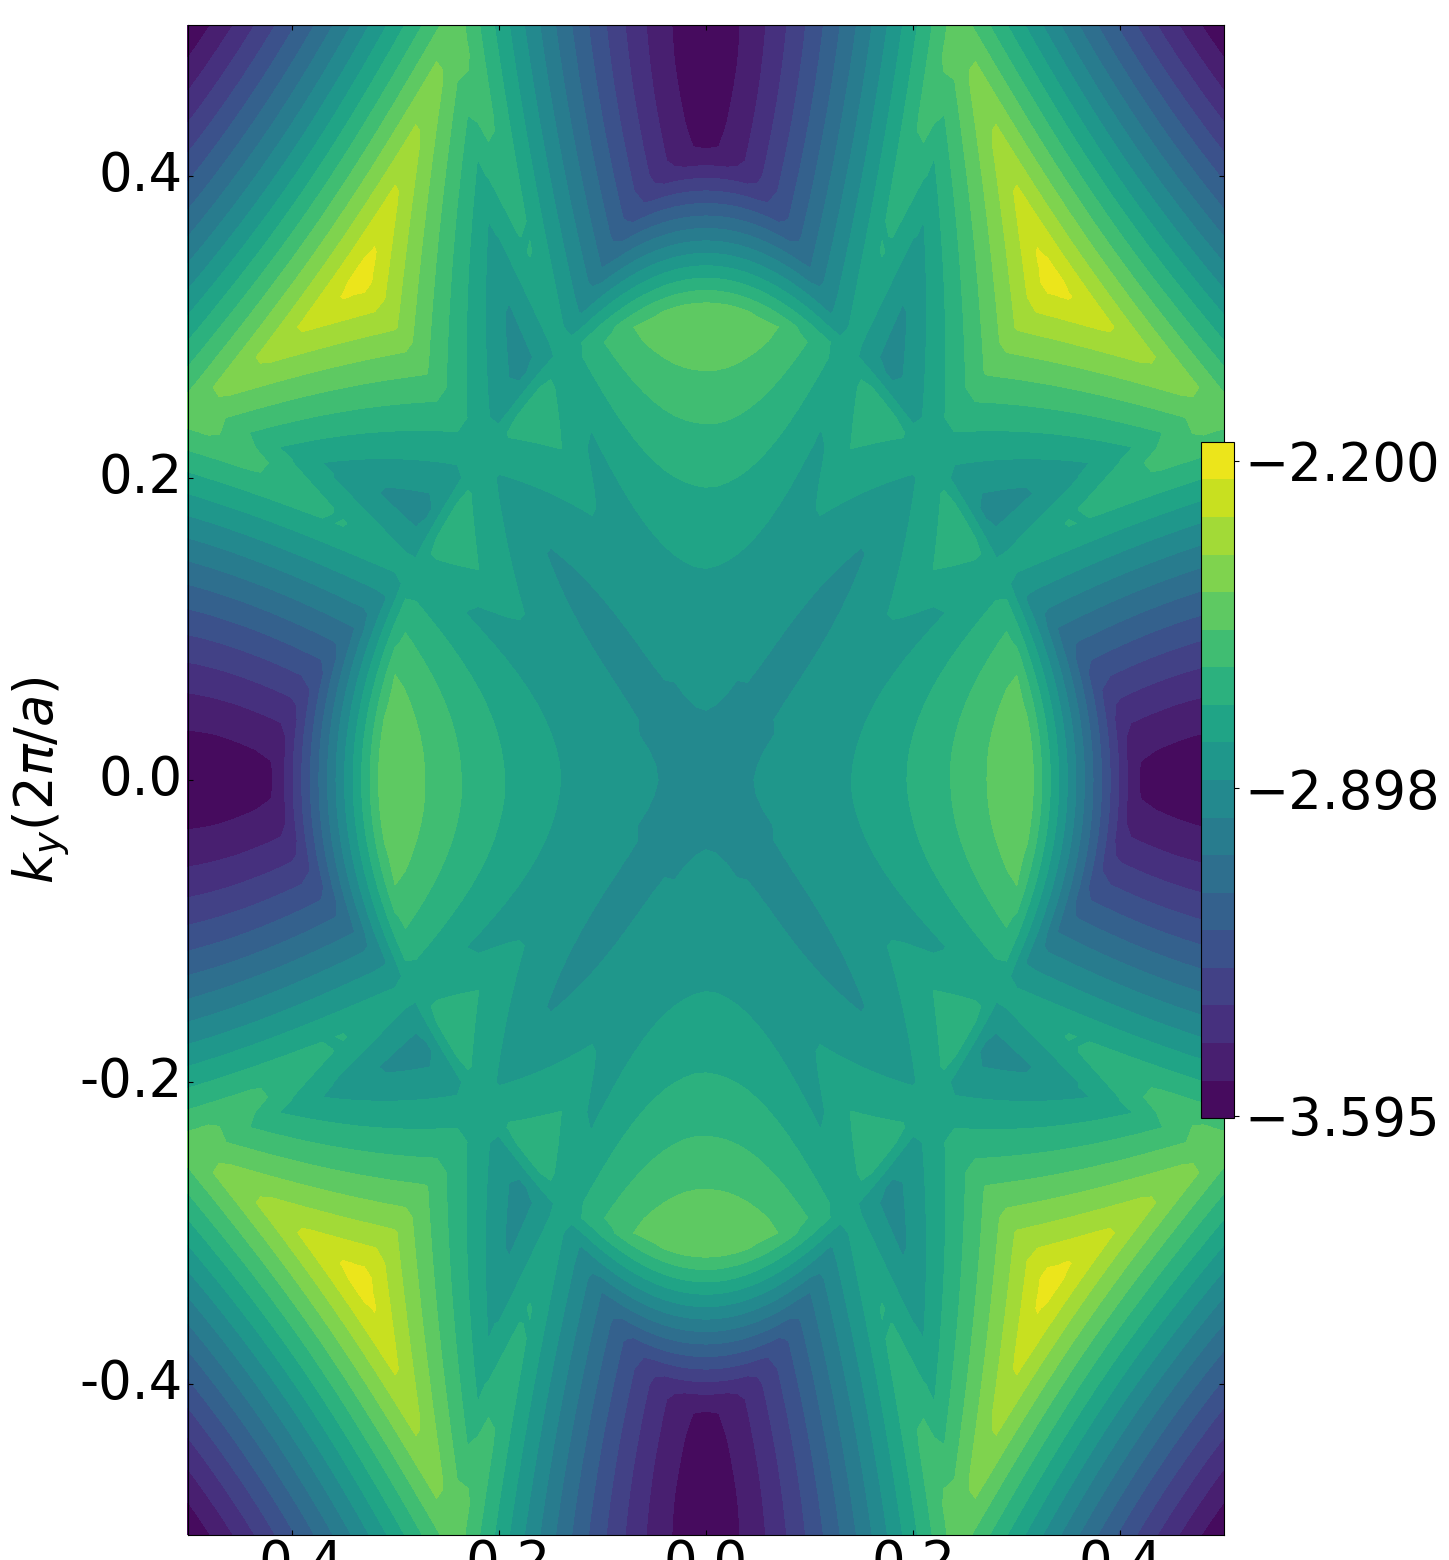

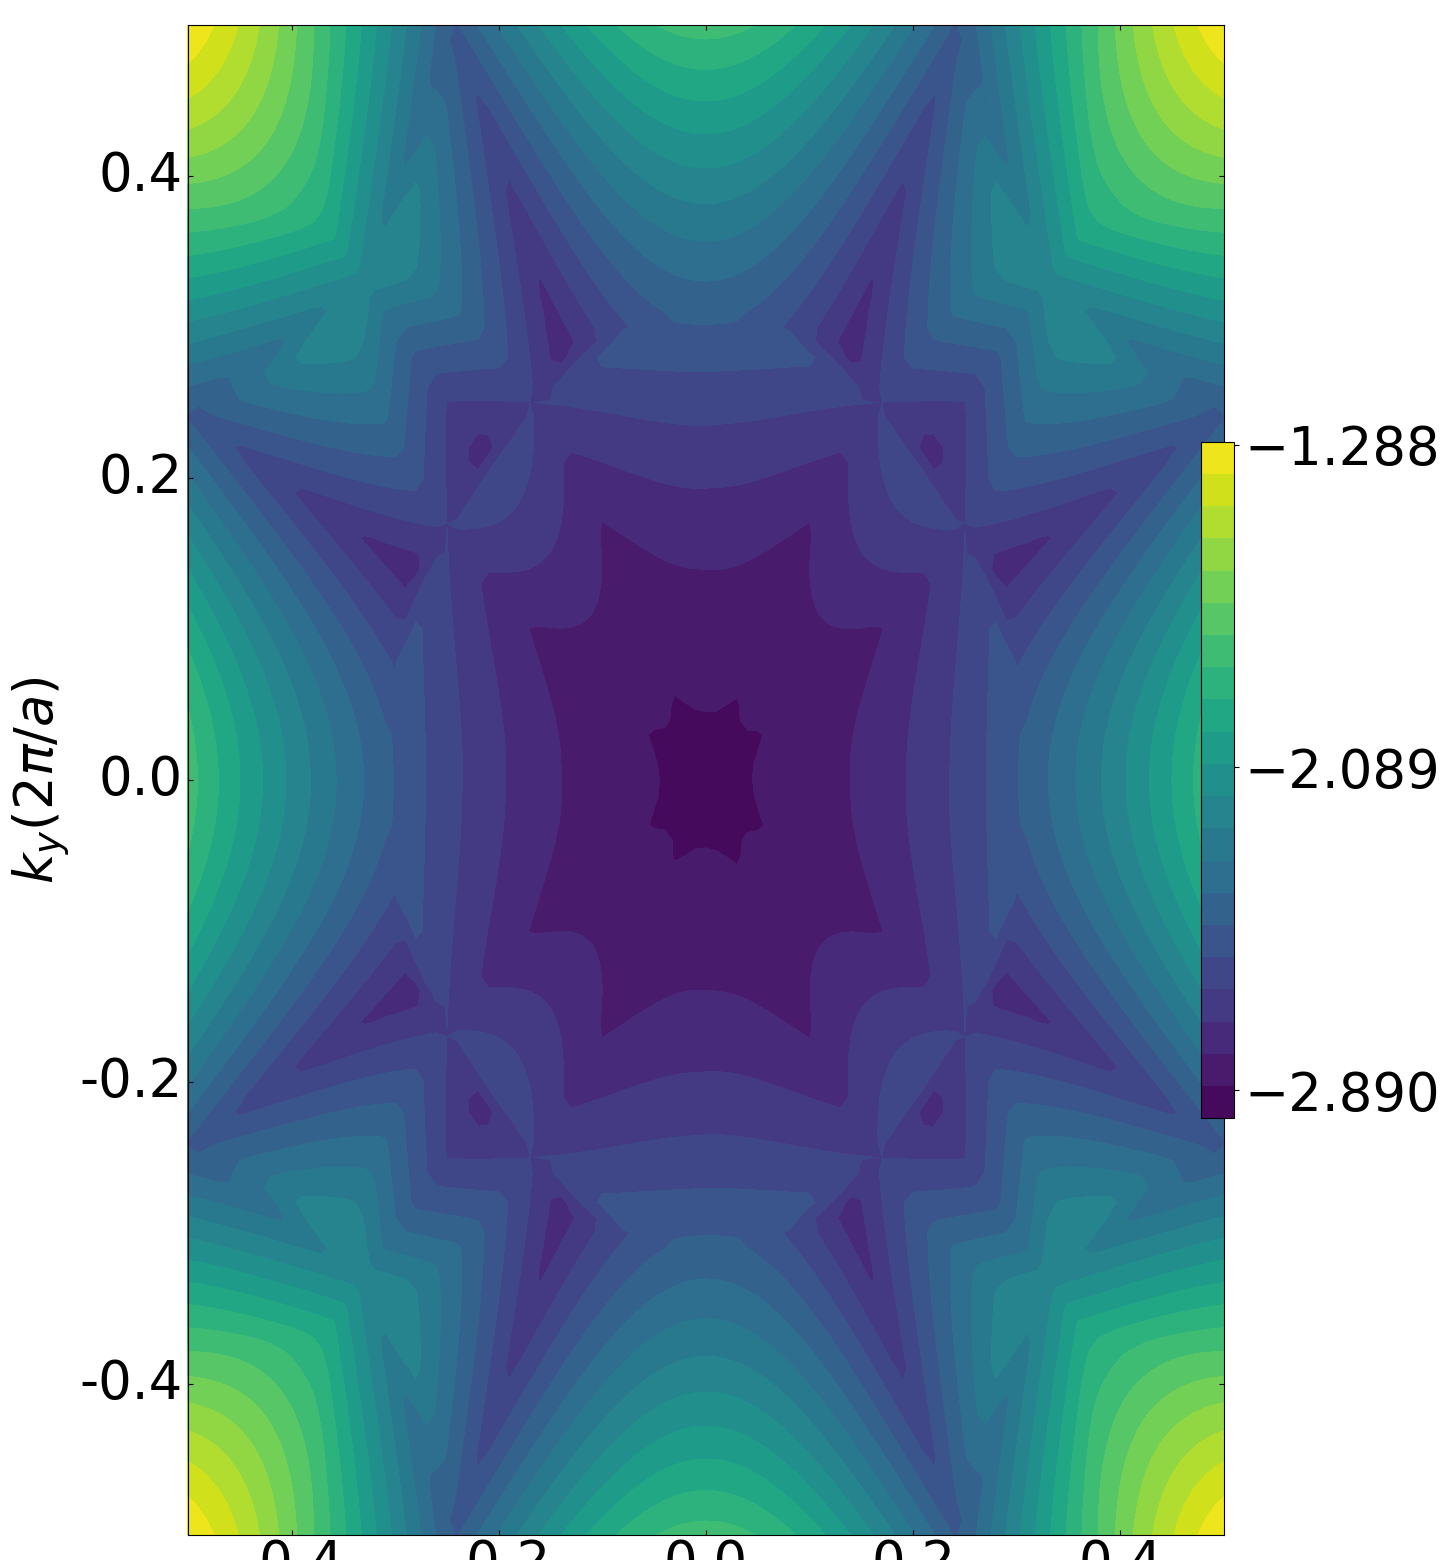

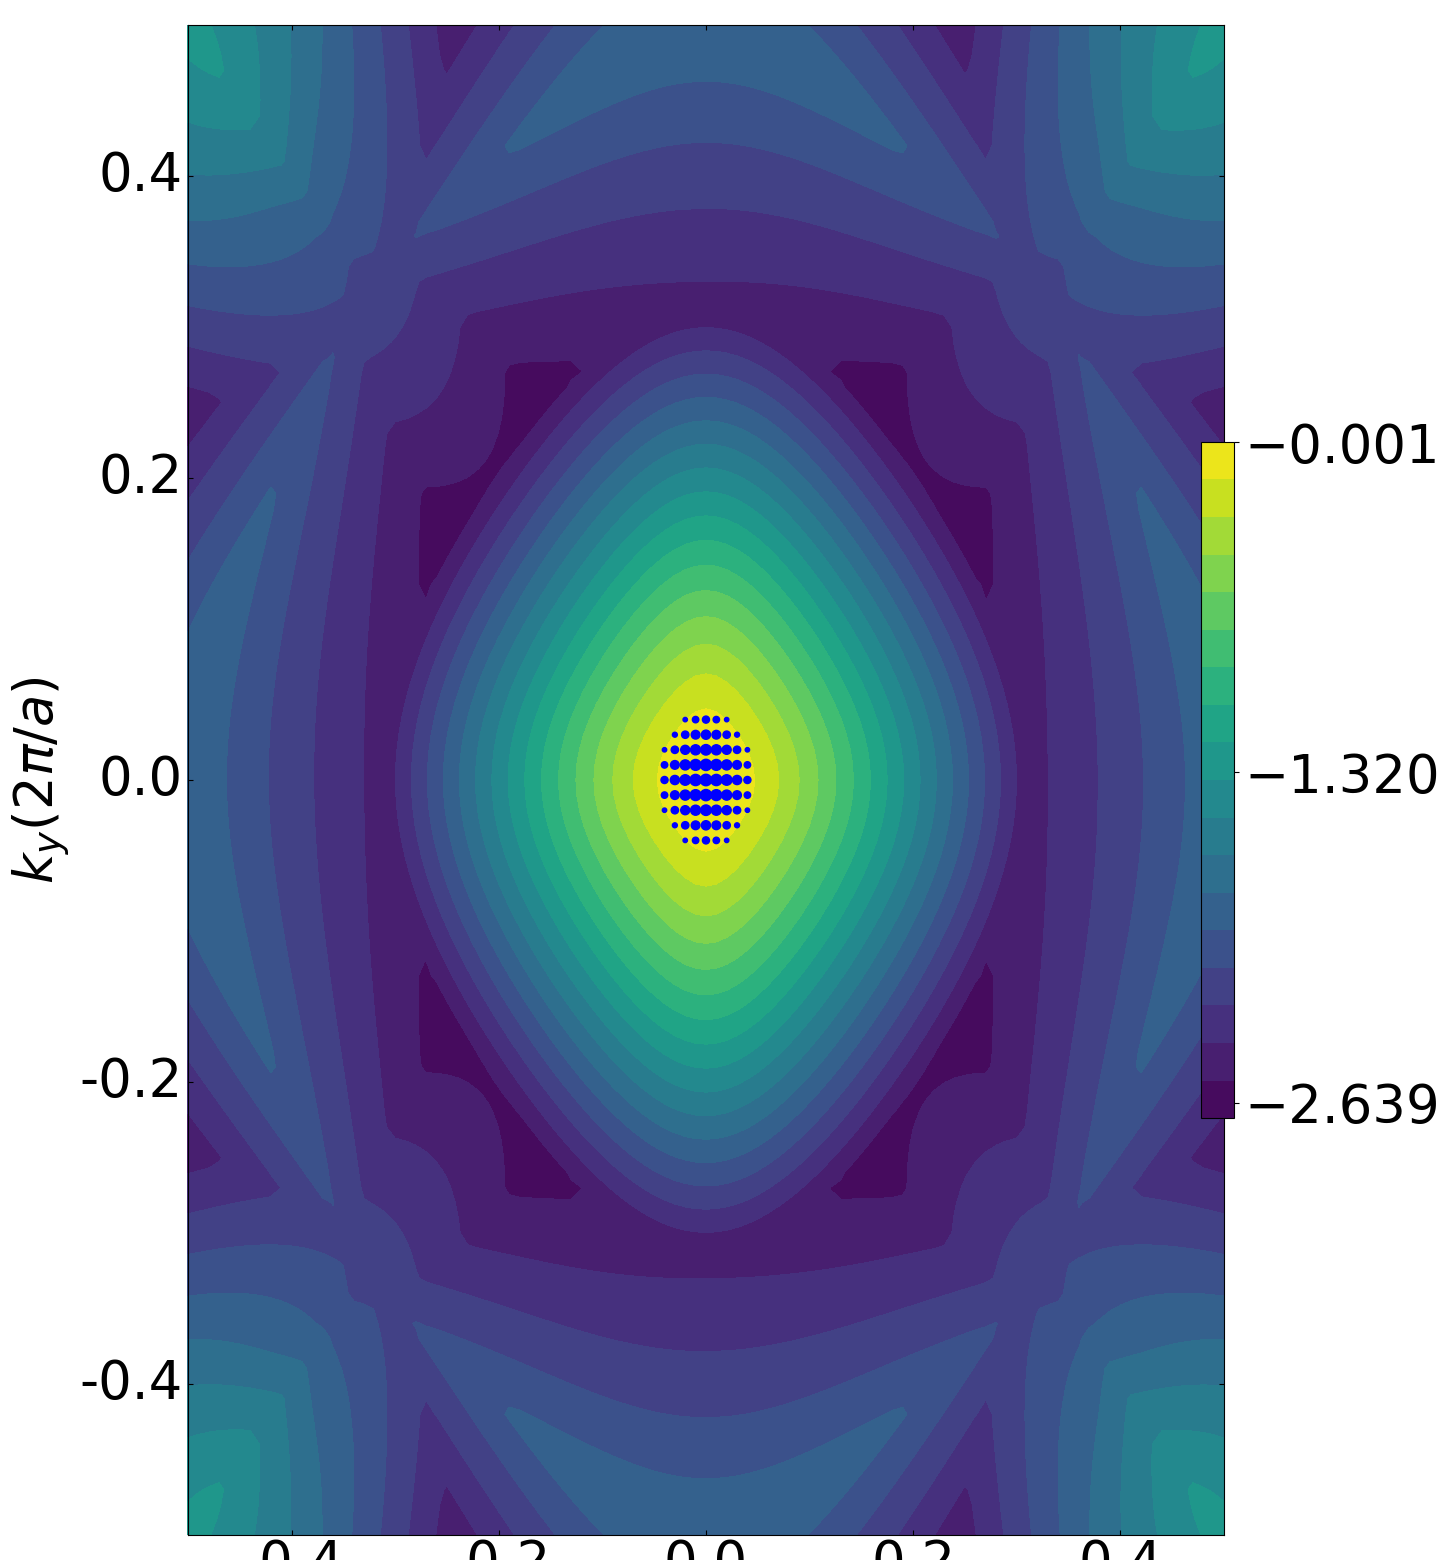

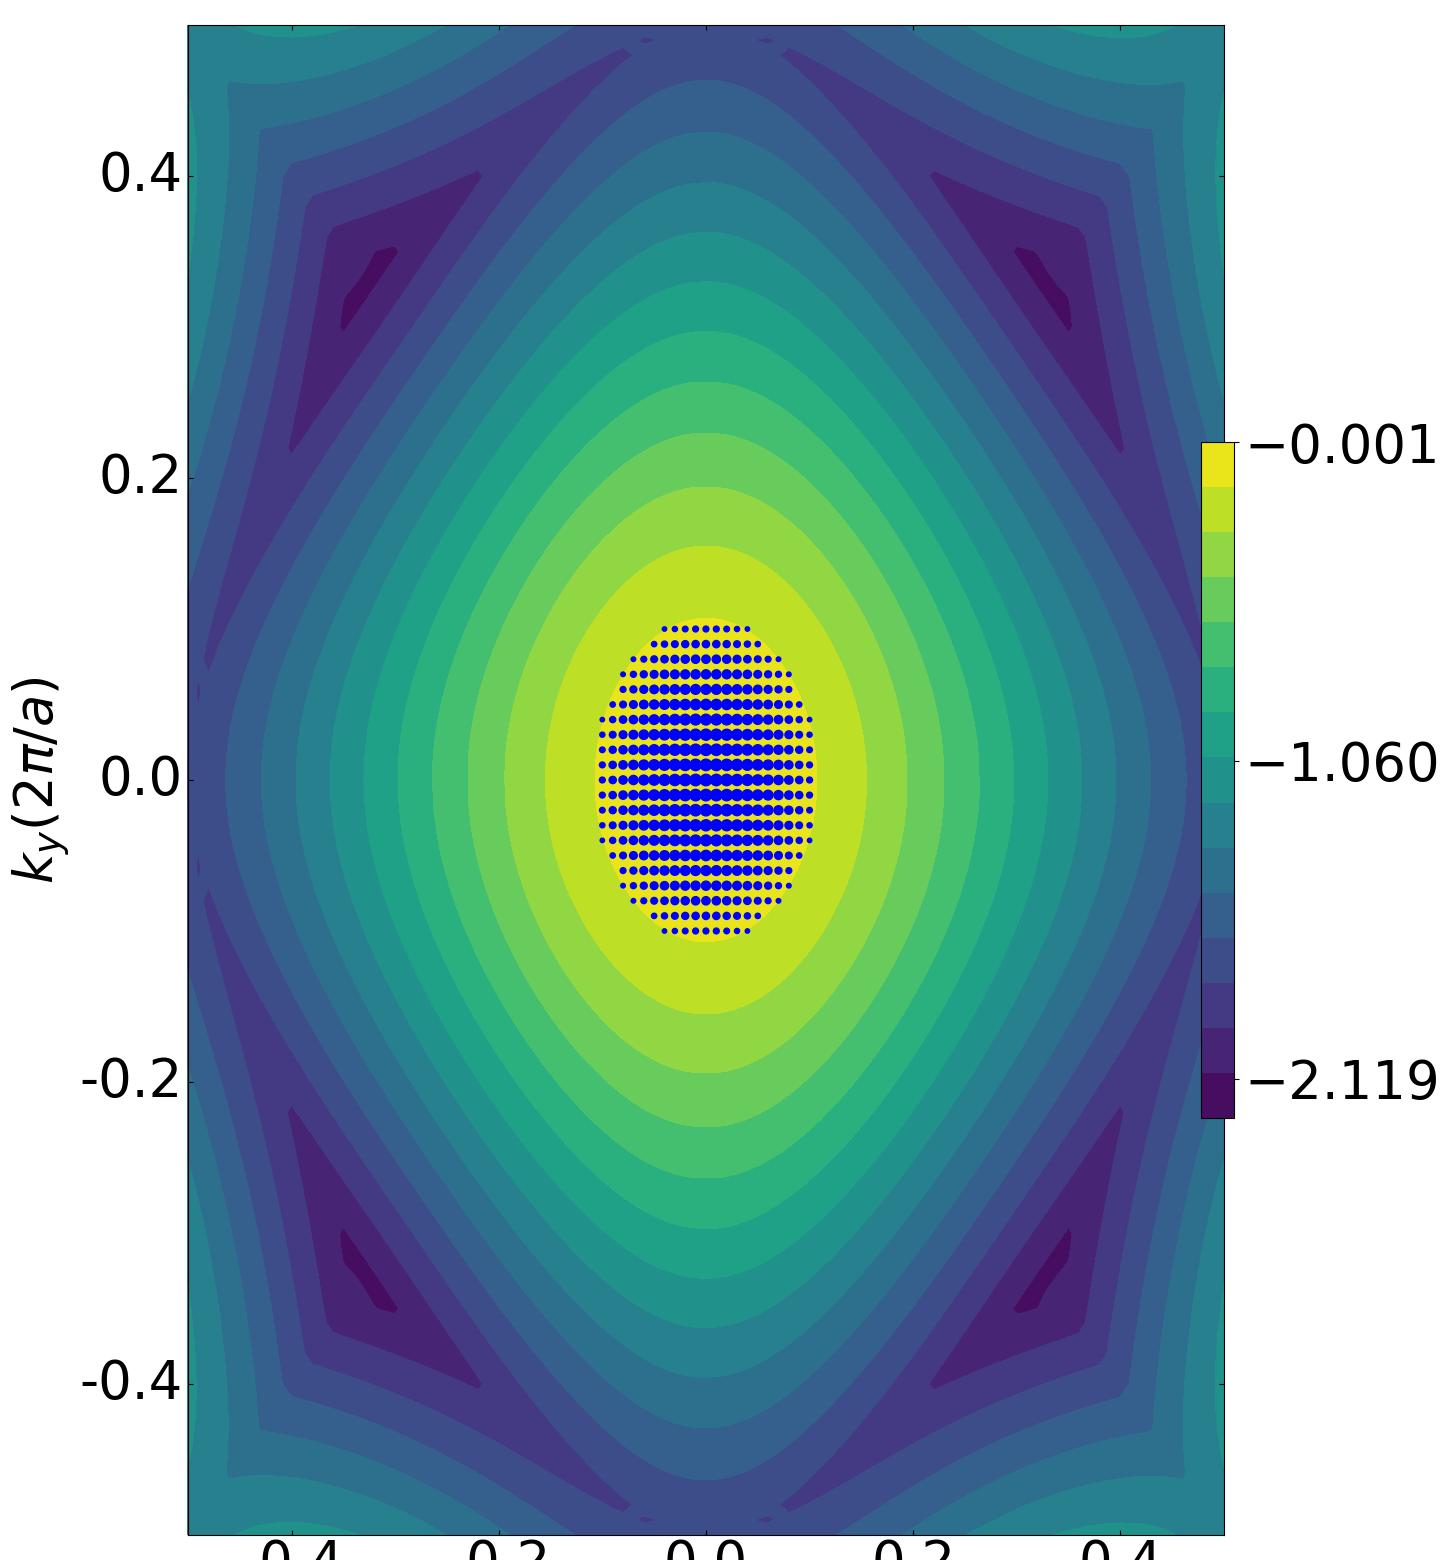

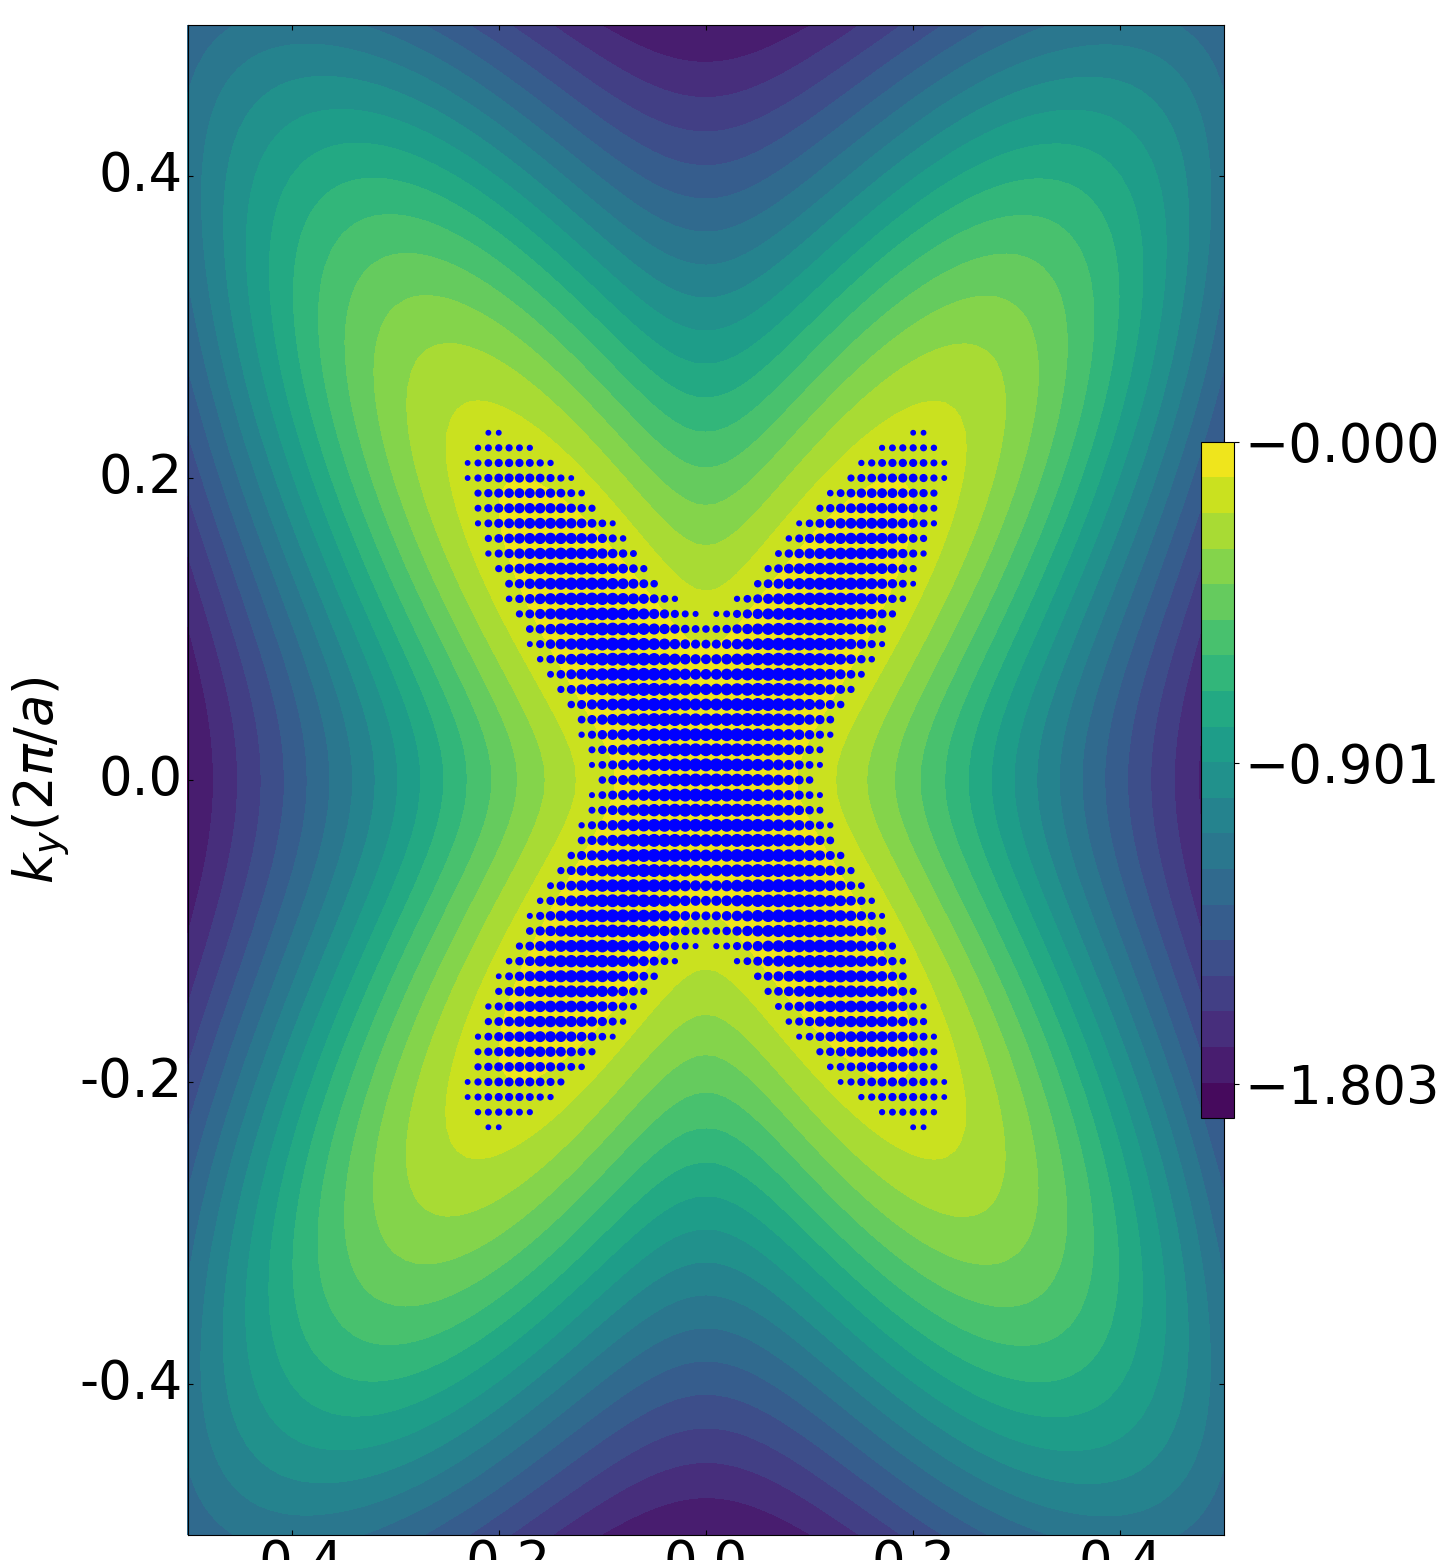

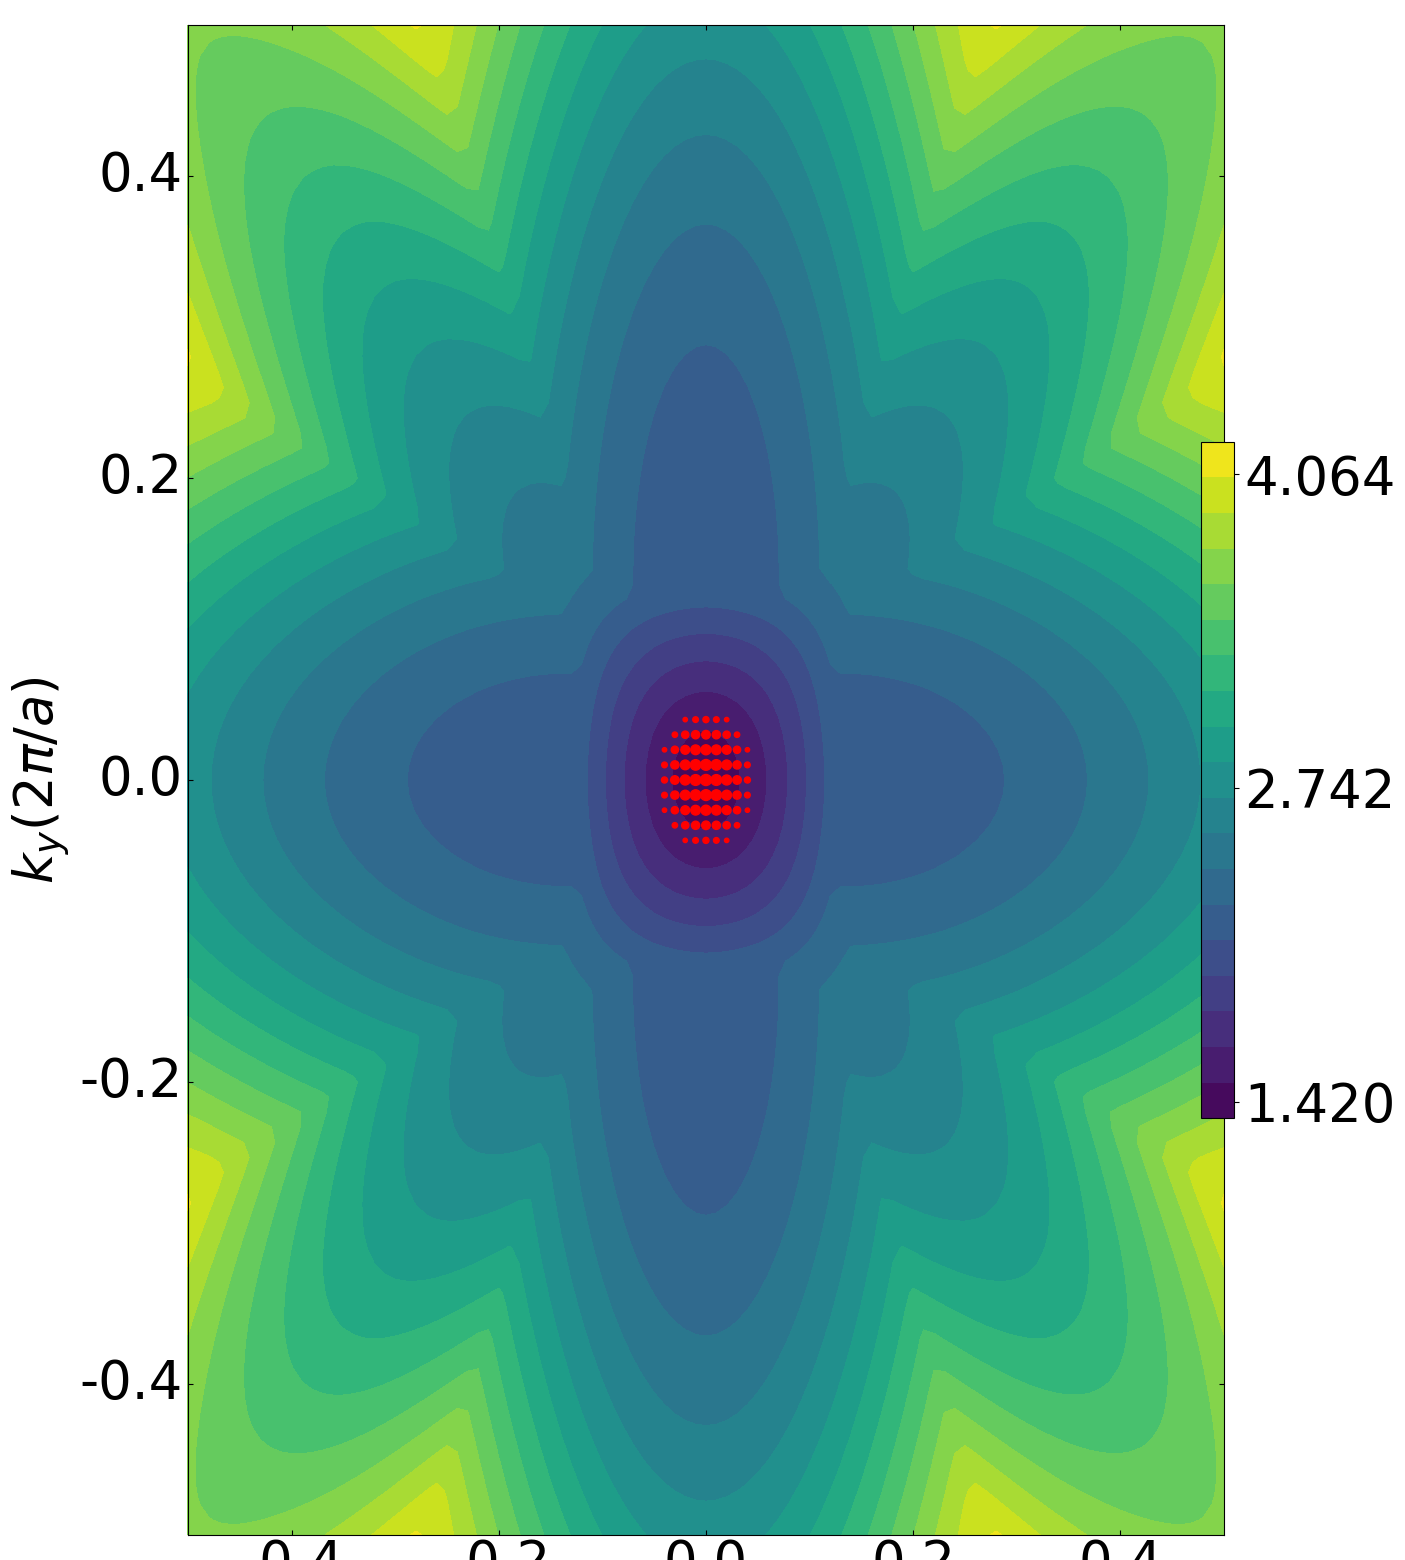

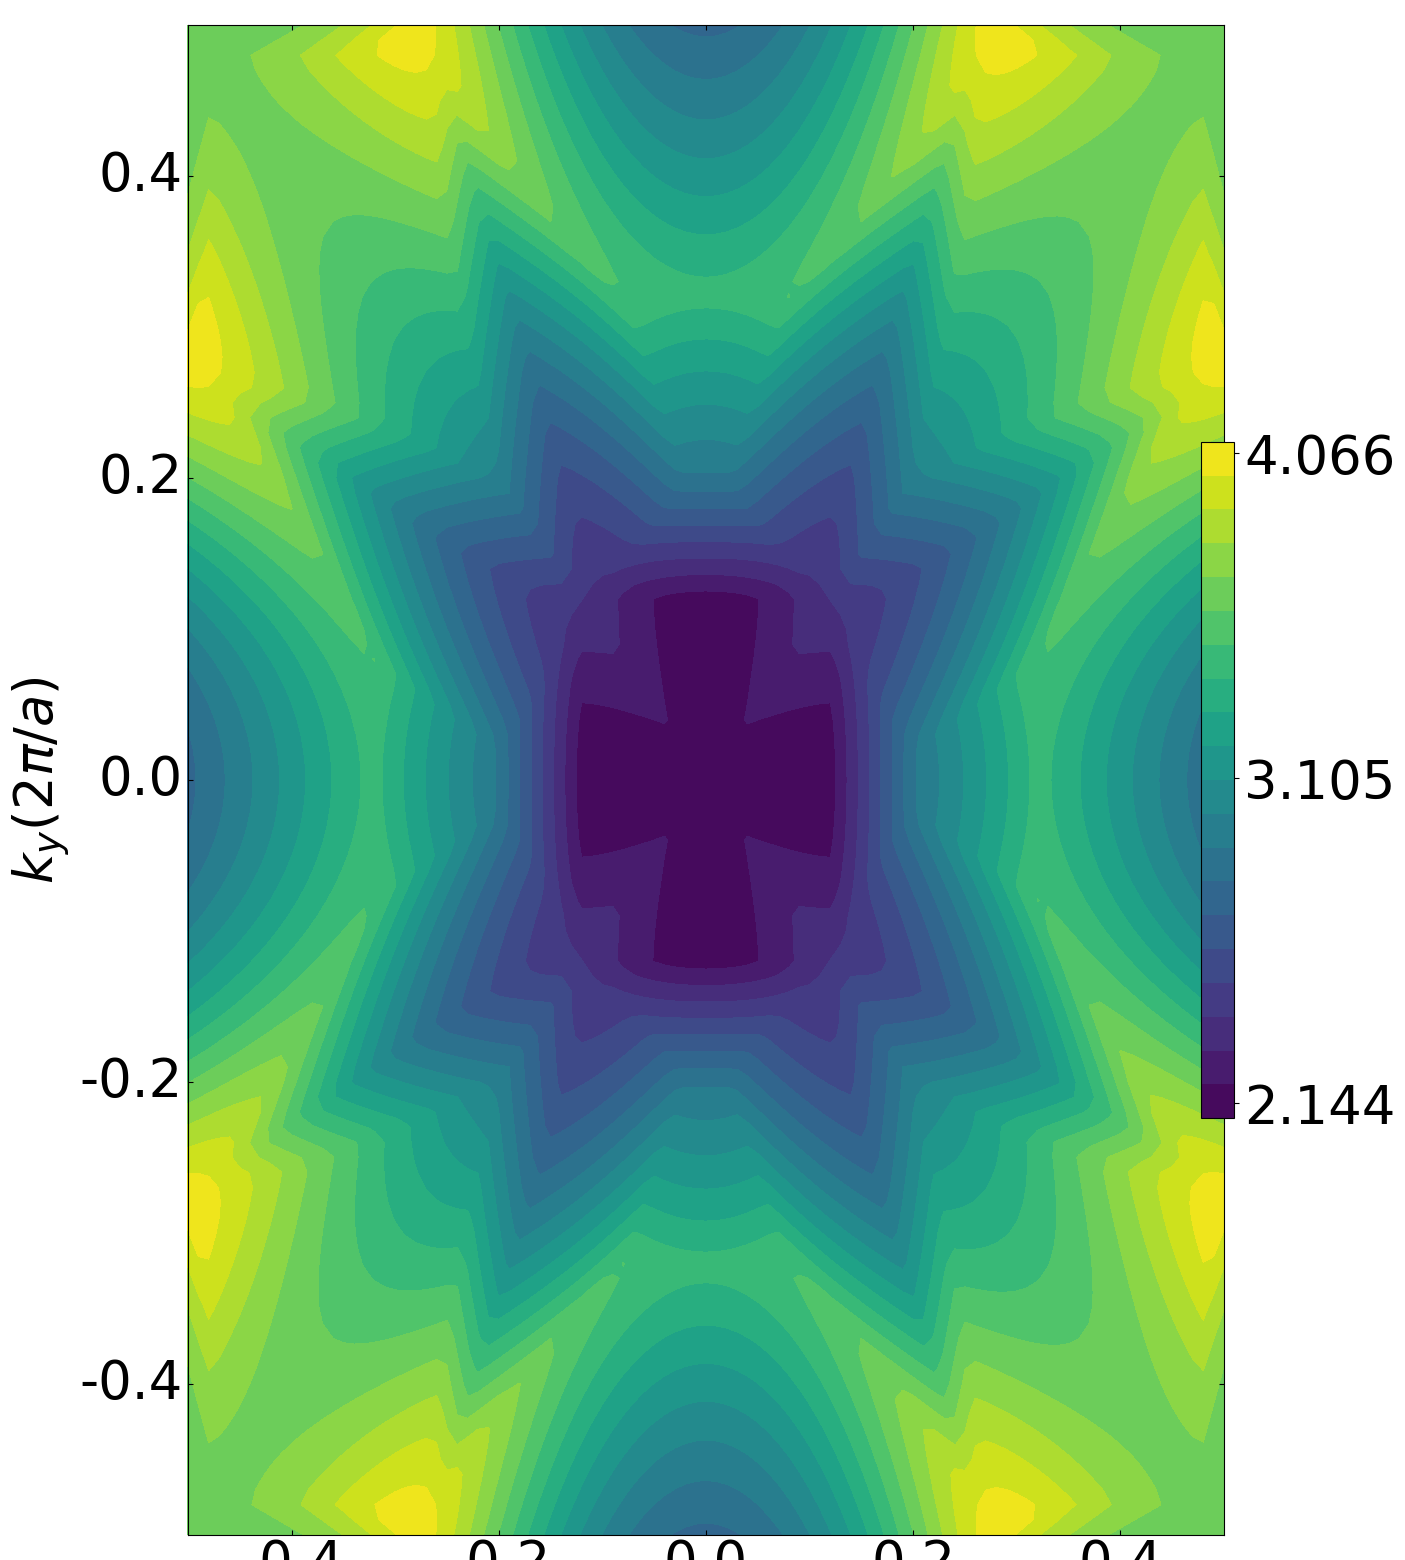

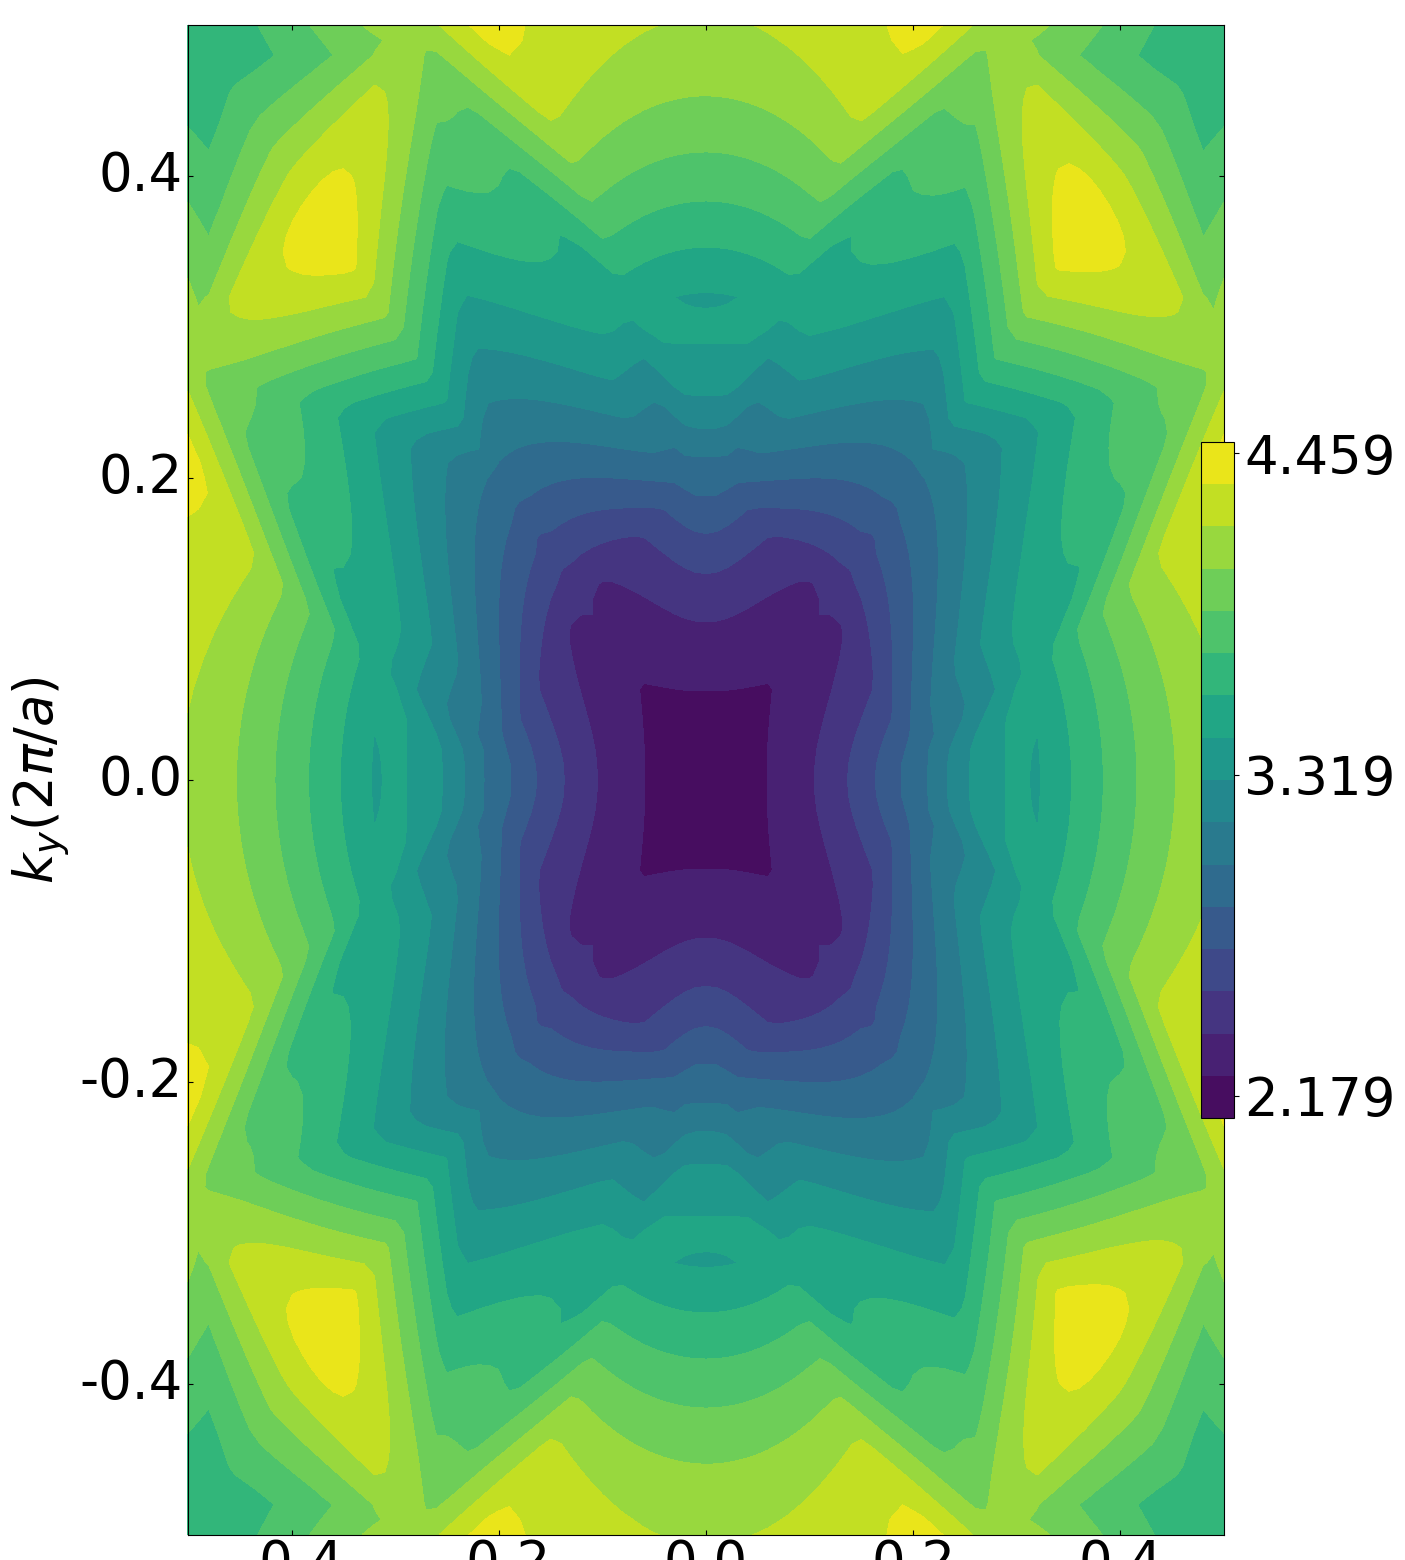

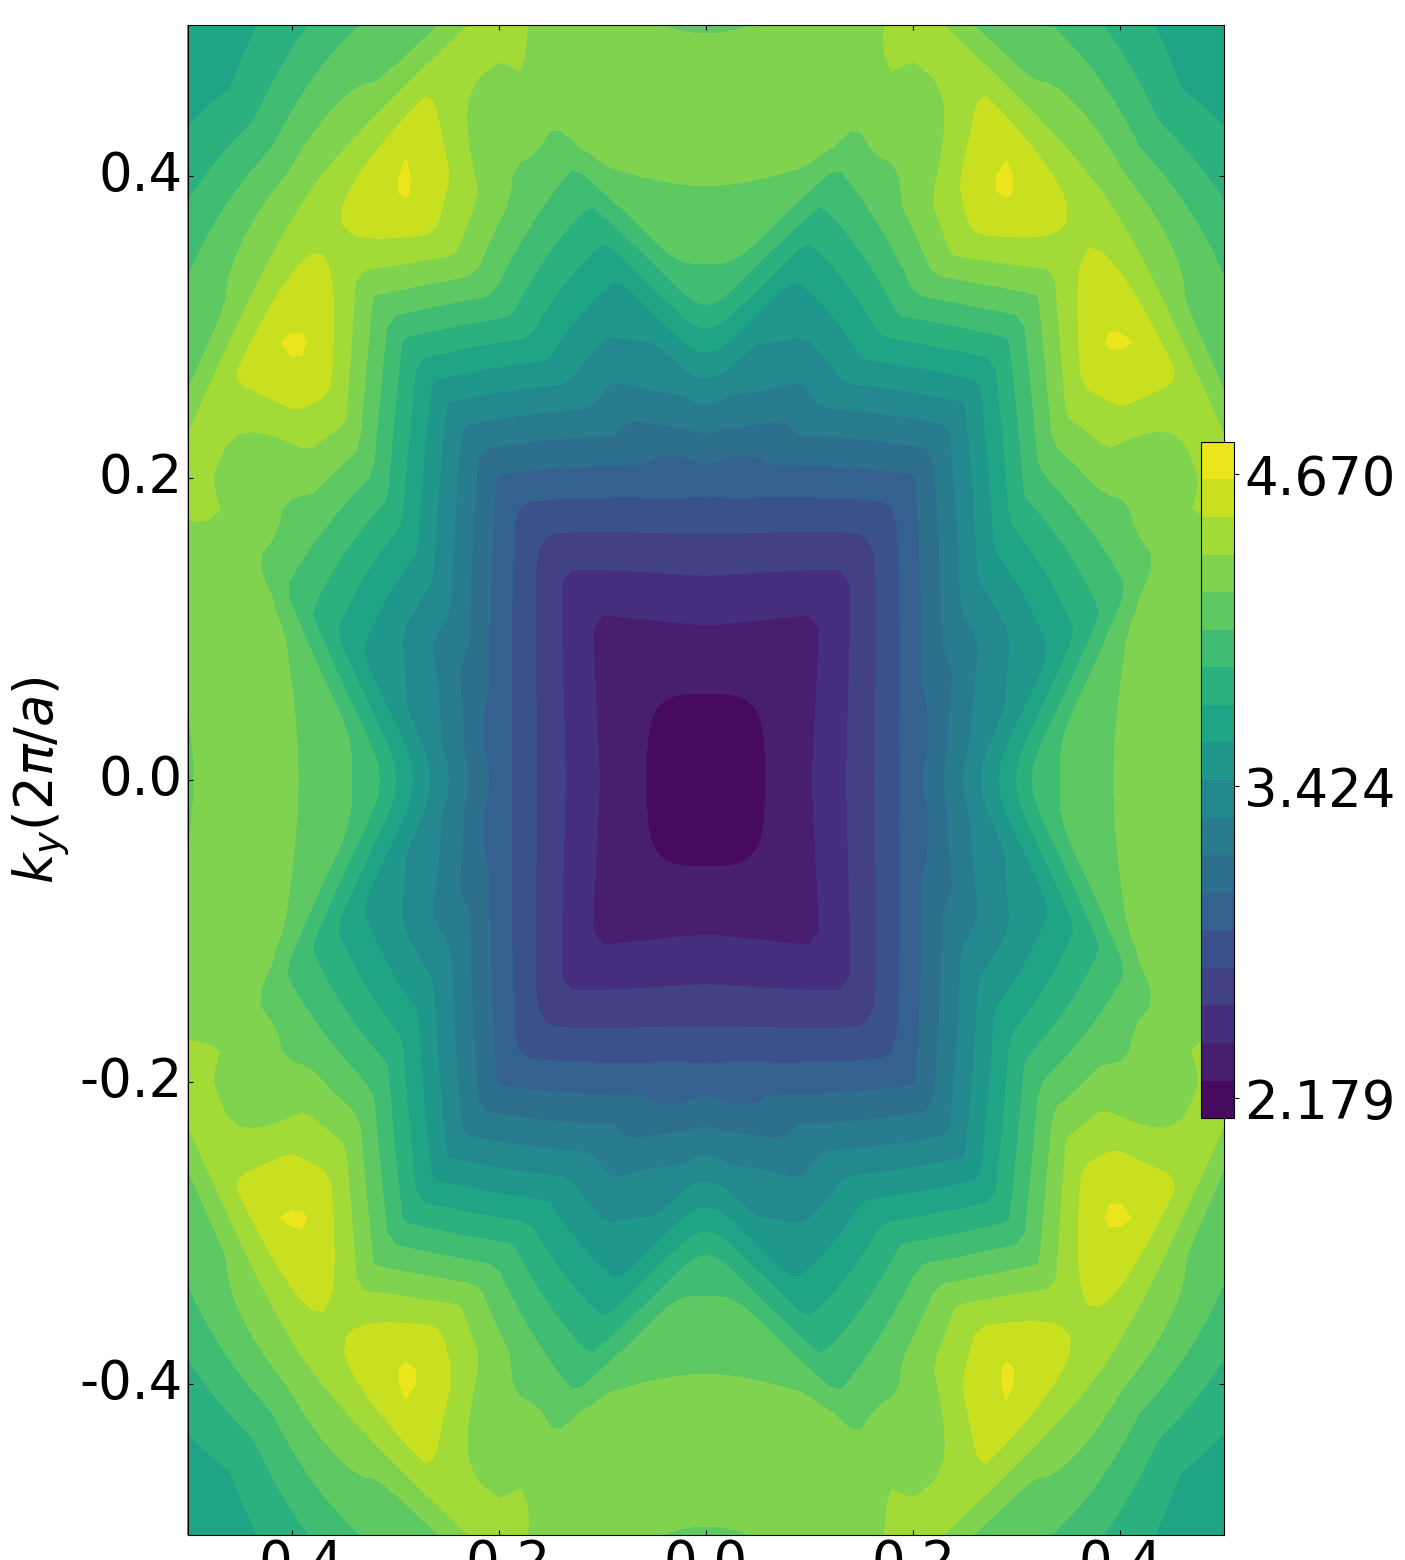

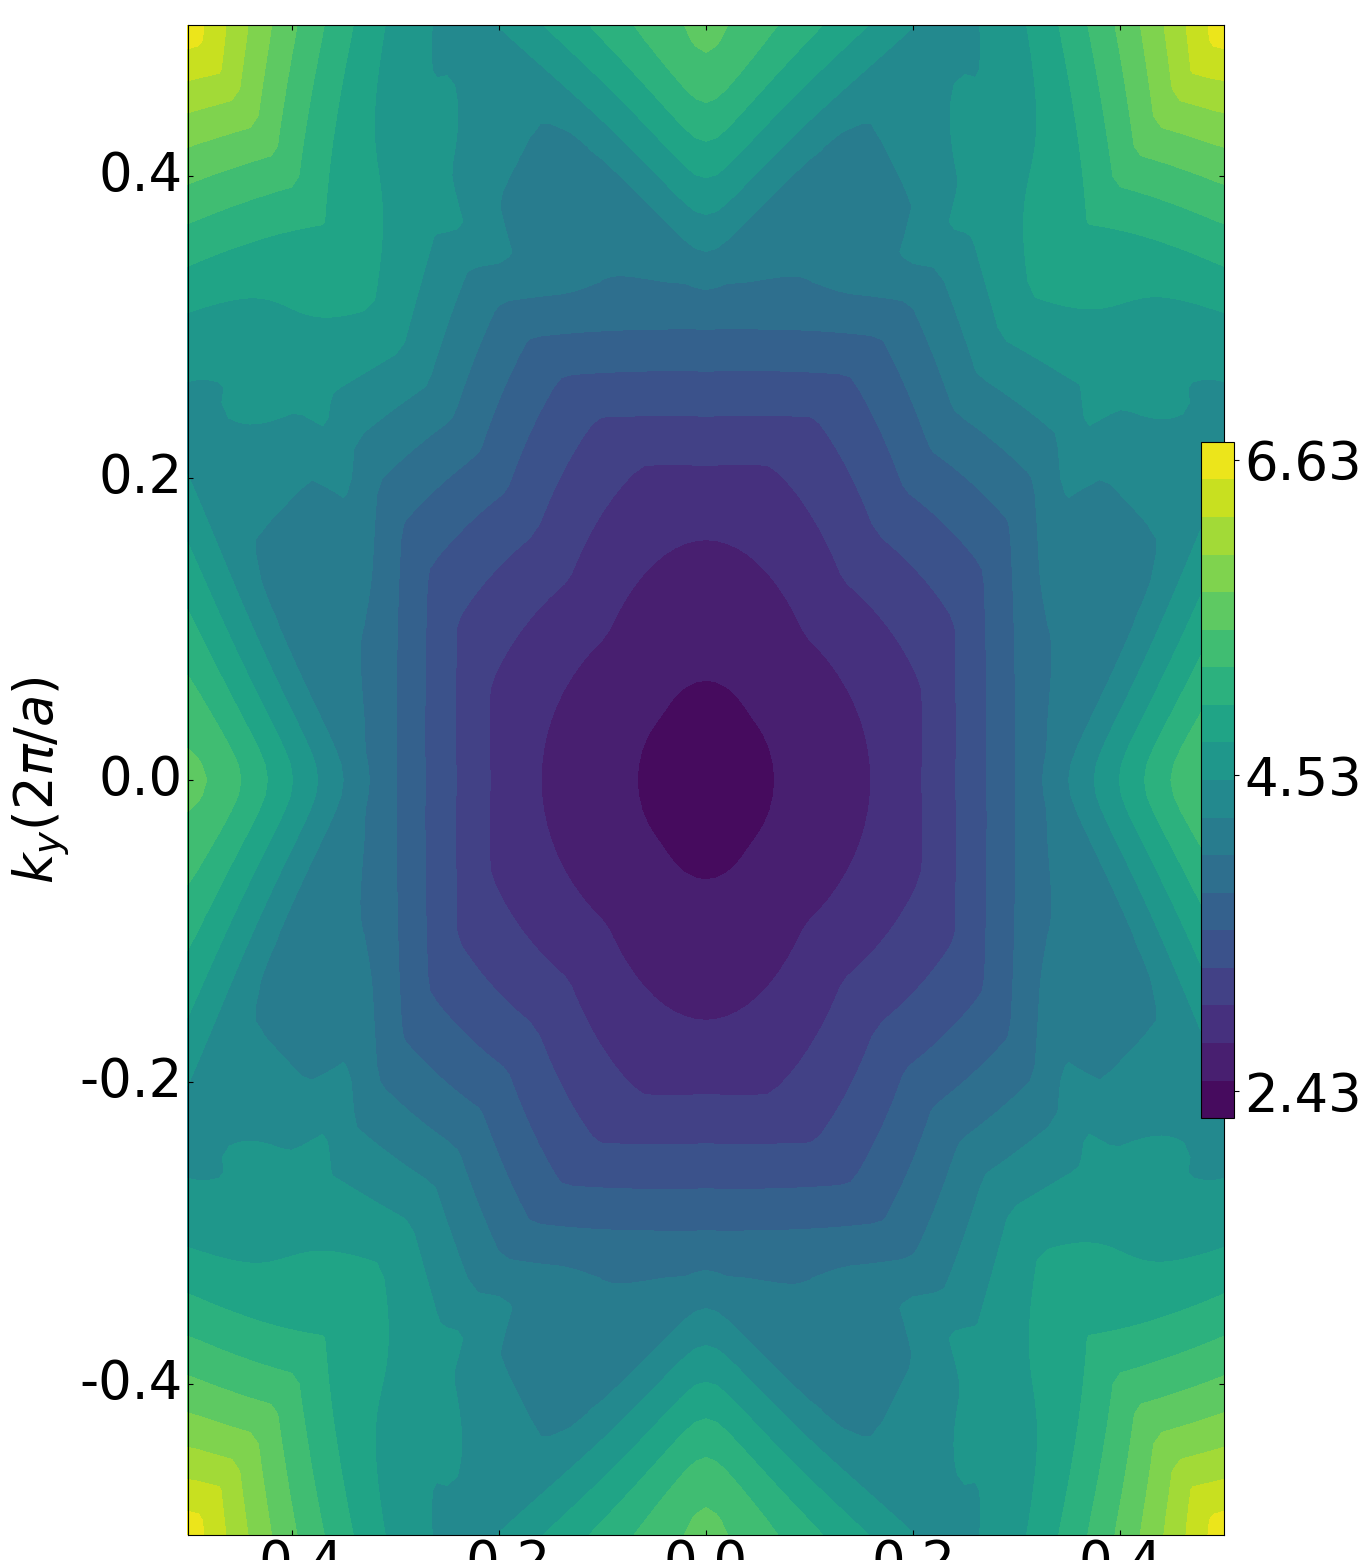

In [1]:
from rate.figure_plot import figure_plot
import argparse

Name = 'GaAs' #materials name 
path = './test_files/' #work path
Vcell = 180 #primitive cell volume
T = [300] #temperature for carrier distribution calculation
D = [1E19] # carrier density for carrier distribution
VB = [32, 33, 34, 35, 36] #valence bands for carrier distribution graph
CB = [37, 38, 39, 40, 41] #conduction bands for carrier distribution graph
soc = False #wheter SOC
direction = 'z' #slice direction for carrier distribution graph
kpoints = [0.0] #k points for slice
Eg = 1.42 # band gap
start_band = 20  #started bands in wannier interpolation in vasp settings

Figure = figure_plot(Name, path)
    
Figure.adsorption_coeff_plot(Eg=Eg) # the absorption coefficients

Figure.radiative_coeff_plot(1E15, 1E19) # the radiative coefficients

Figure.plot_k_slice(direction, kpoints, Vcell, T, D, VB, CB, soc, start_band) #the carrier distribution

All the final results file including "Bcoeff-GaAs_trail.png" , "absorption-GaAs.pdf" and "GaAs_z=0.0-CB37-1e+19-300K.png" can be found under work directory.
Similarly, those coefficients in other conditions can be calculated by the same way.